<a href="https://colab.research.google.com/github/greenhandatsjtu/greenhandatsjtu.github.io/blob/master/first_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.13.1


In [0]:
fashion_mnist=keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

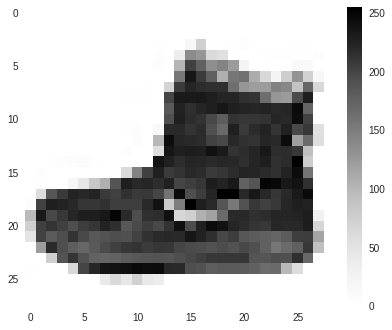

In [15]:
plt.imshow(train_images[0])
plt.grid(False)
plt.colorbar()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

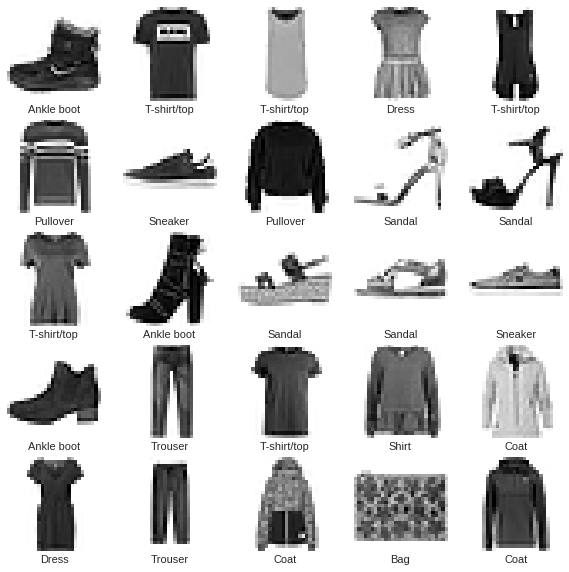

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4994 - acc: 0.8246
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3777 - acc: 0.8633
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3373 - acc: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3131 - acc: 0.8848
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2974 - acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2816 - acc: 0.8967
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2686 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2603 - acc: 0.9037
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2483 - acc: 0.9074
Epoch 10/10
60000/60000 [==============================] - 5s 89us/sample - loss:

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3434 - acc: 0.8796


In [25]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8796


In [0]:
predictions=model.predict(test_images)

In [27]:
predictions[0]

array([4.4394056e-07, 4.8440500e-09, 5.8235632e-11, 3.9369188e-11,
       4.9279168e-07, 7.8287488e-03, 3.3758031e-08, 2.3995370e-02,
       1.5614776e-06, 9.6817333e-01], dtype=float32)

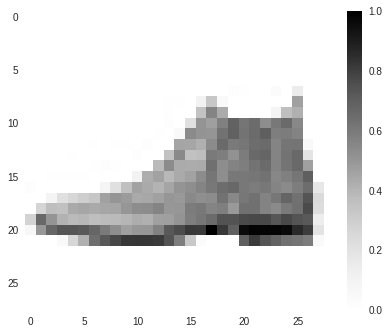

In [29]:
plt.imshow(test_images[0])
plt.grid(False)
plt.colorbar()

<BarContainer object of 10 artists>

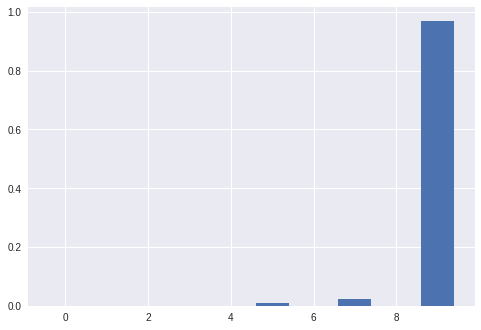

In [32]:
plt.bar(range(0,10),predictions[0])

In [33]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

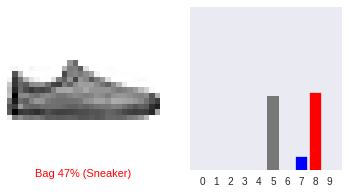

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

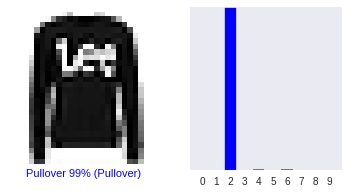

In [41]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

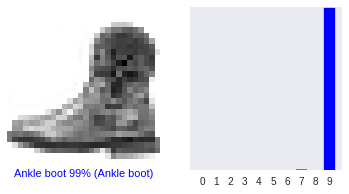

In [42]:
i = 108
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

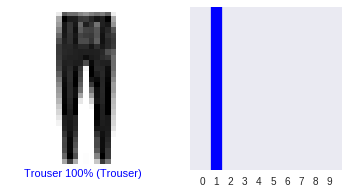

In [43]:
i = 710
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

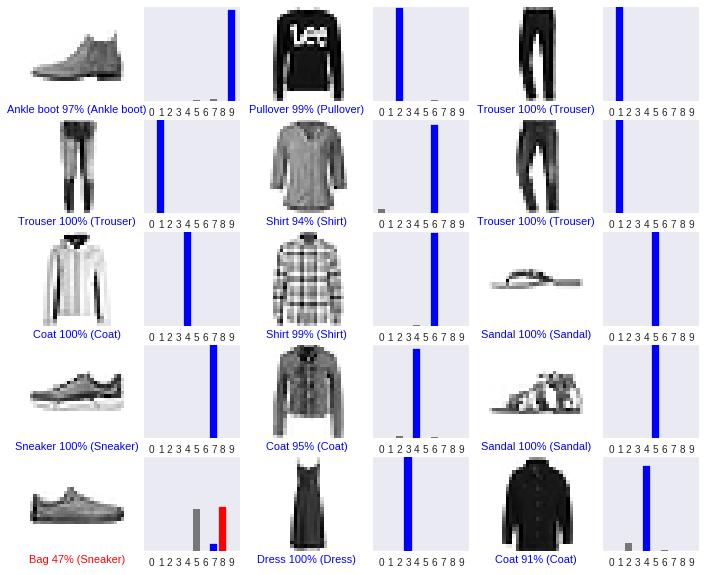

In [44]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [45]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [46]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [47]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.4394181e-07 4.8440500e-09 5.8235514e-11 3.9369414e-11 4.9279072e-07
  7.8287423e-03 3.3758099e-08 2.3995373e-02 1.5614834e-06 9.6817333e-01]]


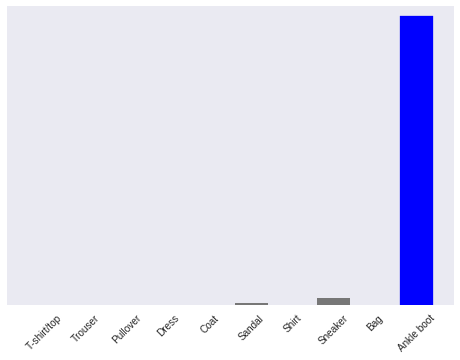

In [52]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10),class_names, rotation=45)